In [1]:
import pandas as pd

In [2]:
# Load data for badminton
data_badminton = pd.read_csv("reviews_data_dump/reviews_badminton/data.csv")

# Load data for tawa
data_tawa = pd.read_csv("reviews_data_dump/reviews_tawa/data.csv")

# Load data for tea
data_tea = pd.read_csv("reviews_data_dump/reviews_tea/data.csv")

In [3]:
# EDA for data_badminton
print("EDA for data_badminton:")
print(data_badminton.info())
print(data_badminton.describe())

# EDA for data_tawa
print("\nEDA for data_tawa:")
print(data_tawa.info())
print(data_tawa.describe())

# EDA for data_tea
print("\nEDA for data_tea:")
print(data_tea.info())
print(data_tea.describe())

EDA for data_badminton:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB
None
          Up Votes   Down Votes      Ratings
count  8508.000000  8508.000000  8518.000000
mean      0.391396     0.121768     4.181028
std      11.613909     3.248022     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.0

In [4]:
# Rename columns to have consistent names
data_badminton.rename(columns={'Reviewer Name': 'reviewer_name',
                                'Review Title': 'review_title',
                                'Place of Review': 'place_of_review',
                                'Up Votes': 'up_votes',
                                'Down Votes': 'down_votes',
                                'Month': 'date_of_review',
                                'Review text': 'review_text',
                                'Ratings': 'reviewer_rating'}, inplace=True)

data_tawa.rename(columns={'Reviewer_Name': 'reviewer_name',
                            'Reviewer_Rating': 'reviewer_rating',
                            'Review_Title': 'review_title',
                            'Review_Text': 'review_text',
                            'Place_of_Review': 'place_of_review',
                            'Date_of_Review': 'date_of_review',
                            'Up_Votes': 'up_votes',
                            'Down_Votes': 'down_votes'}, inplace=True)

data_tea.rename(columns={'reviewer_rating': 'reviewer_rating',
                            'reviewer_name': 'reviewer_name',
                            'review_title': 'review_title',
                            'review_text': 'review_text',
                            'place_of_review': 'place_of_review',
                            'Date_of_review': 'date_of_review',
                            'up_votes': 'up_votes',
                            'Down_votes': 'down_votes'}, inplace=True)

In [5]:
# Add a 'Product' column to each dataset
data_badminton['Product'] = 'Badminton'
data_tawa['Product'] = 'Tawa'
data_tea['Product'] = 'Tea'

# Concatenate datasets for easier analysis
data_combined = pd.concat([data_badminton, data_tawa, data_tea], ignore_index=True)

In [6]:
data_combined.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'date_of_review', 'review_text', 'reviewer_rating',
       'Product'],
      dtype='object')

In [7]:
data_combined.shape

(20219, 9)

Summary Statistics for Ratings:
          reviewer_rating          
                     mean  min  max
Product                            
Badminton        4.181028  1.0  5.0
Tawa             4.490153  3.0  5.0
Tea              4.400000  1.0  5.0


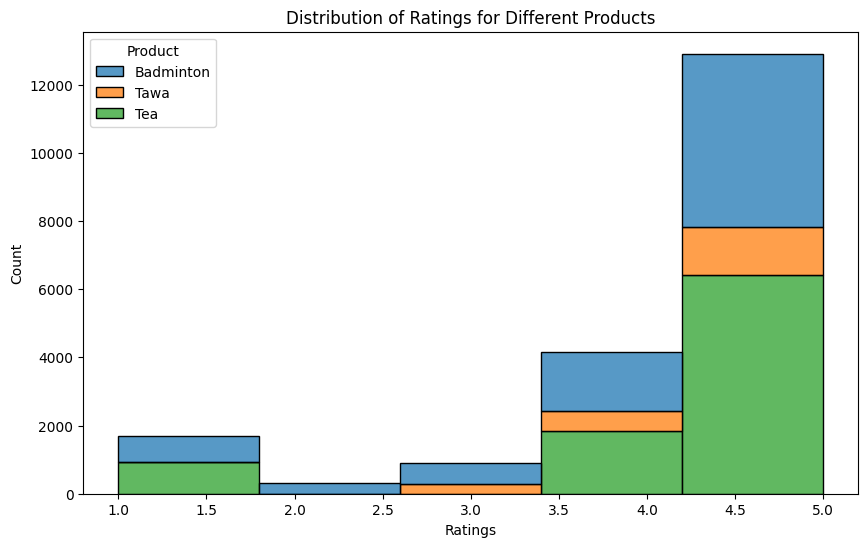

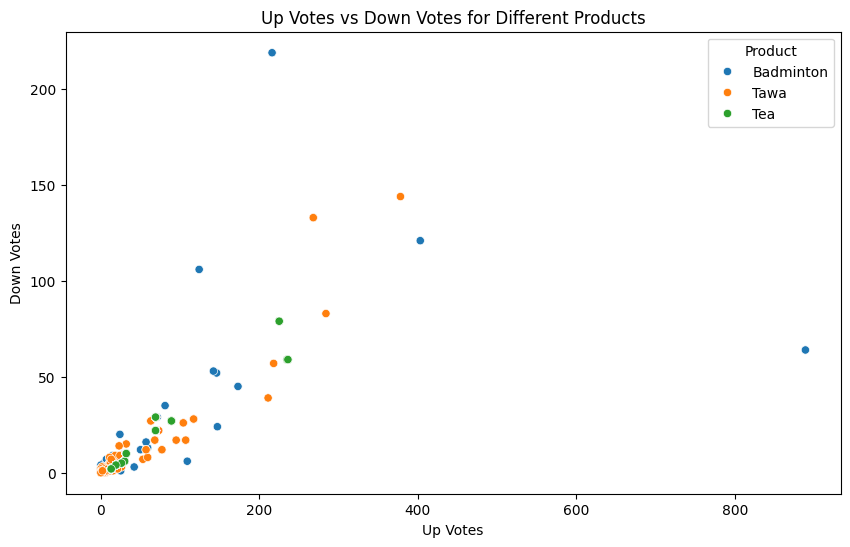

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check summary statistics
print("Summary Statistics for Ratings:")
print(data_combined.groupby('Product').agg({'reviewer_rating': ['mean', 'min', 'max']}))

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data_combined, x='reviewer_rating', hue='Product', multiple='stack', bins=5)
plt.title('Distribution of Ratings for Different Products')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# Up Votes vs Down Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_combined, x='up_votes', y='down_votes', hue='Product')
plt.title('Up Votes vs Down Votes for Different Products')
plt.xlabel('Up Votes')
plt.ylabel('Down Votes')
plt.show()

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    if isinstance(text, str):
        # Text Cleaning: Remove special characters, punctuation, and stopwords
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = text.lower()  # Convert text to lowercase
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word not in stop_words]

        # Text Normalization: Lemmatization
        lemmatizer = WordNetLemmatizer()
        normalized_text = [lemmatizer.lemmatize(word) for word in filtered_text]

        return normalized_text
    else:
        return ''

# Apply preprocessing function to the 'review_text' column
data_combined['cleaned_review_text'] = data_combined['review_text'].apply(preprocess_text)

# Preview the preprocessed text
print(data_combined[['review_text', 'cleaned_review_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         review_text  \
0  Nice product, good quality, but price is now r...   
1  They didn't supplied Yonex Mavis 350. Outside ...   
2  Worst product. Damaged shuttlecocks packed in ...   
3  Quite O. K. , but nowadays  the quality of the...   
4  Over pricedJust â?¹620 ..from retailer.I didn'...   

                                 cleaned_review_text  
0  [nice, product, good, quality, price, rising, ...  
1  [didnt, supplied, yonex, mavis, outside, cover...  
2  [worst, product, damaged, shuttlecock, packed,...  
3  [quite, k, nowadays, quality, cork, like, year...  
4  [pricedjust, â¹, retaileri, didnt, understand,...  


In [10]:
data_combined.columns

Index(['reviewer_name', 'review_title', 'place_of_review', 'up_votes',
       'down_votes', 'date_of_review', 'review_text', 'reviewer_rating',
       'Product', 'cleaned_review_text'],
      dtype='object')

In [11]:
data_combined.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,date_of_review,review_text,reviewer_rating,Product,cleaned_review_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4.0,Badminton,"[nice, product, good, quality, price, rising, ..."
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1.0,Badminton,"[didnt, supplied, yonex, mavis, outside, cover..."
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1.0,Badminton,"[worst, product, damaged, shuttlecock, packed,..."
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3.0,Badminton,"[quite, k, nowadays, quality, cork, like, year..."
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0,Badminton,"[pricedjust, â¹, retaileri, didnt, understand,..."


In [12]:
data_combined['cleaned_review_text'][0]

['nice',
 'product',
 'good',
 'quality',
 'price',
 'rising',
 'bad',
 'sign',
 'affordable',
 'price',
 'especially',
 'play',
 'everyday',
 'kindly',
 'help',
 'u',
 'term',
 'price',
 'thank',
 'youread']

In [13]:
text = ' '.join(data_combined['cleaned_review_text'][0])
print(text)

nice product good quality price rising bad sign affordable price especially play everyday kindly help u term price thank youread


In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Define a function to analyze the sentiment of each review text

def analyze_sentiment(word_list):
    # Convert the list of words into a single string
    text = ' '.join(word_list)
    
    compound_score = sid.polarity_scores(text)['compound']
    
    # Assign positive sentiment if compound score is greater than 0, else negative sentiment
    if compound_score > 0:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Apply the function to the 'cleaned_review_text' column
data_combined['sentiments'] = data_combined['cleaned_review_text'].apply(analyze_sentiment)

# Display the DataFrame with the new 'sentiments' column
print(data_combined.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            reviewer_name               review_title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               place_of_review  up_votes  down_votes date_of_review  \
0   Certified Buyer, Chirakkal     889.0        64.0       Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0       Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0       Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0            NaN   
4                          NaN     147.0        24.0       Apr 2016   

                                         review_text  reviewer_rating  \
0  Nice product, good quality, but price is now r...              4.0   
1  They didn't supplied Yonex Mavis 350. Outside ...              1.0   
2  Worst product.

In [15]:
from sklearn.model_selection import train_test_split
# Step 1: Split Data
# Fill NaN values with an empty string
data_combined['review_text'] = data_combined['review_text'].fillna('')

# Or drop rows with NaN values
data_combined = data_combined.dropna(subset=['review_text'])
X = data_combined['review_text']
y = data_combined['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import pickle


# Define a list of classifiers to try
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', MultinomialNB())
]

best_model = None
best_f1_score = 0

# Iterate over classifiers
for clf_name, clf in classifiers:
    # Define the pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score for {clf_name}: {f1}")
    
    # Check if this model is the best so far
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = pipeline

# Pickle the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


F1-score for Logistic Regression: 0.9750435287289612
F1-score for Random Forest: 0.972377824995171
F1-score for Naive Bayes: 0.9492112350904194


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', MultinomialNB())
]

best_f1_score = 0
best_model = None

# Iterate over different classifiers
for name, classifier in classifiers:
    # Define the pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorization
        ('clf', classifier)  # Classifier
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions on training and testing sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate F1-score on training and testing sets
    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    
    print(f"Classifier: {name}")
    print(f"Train F1-score: {train_f1_score:.4f}")
    print(f"Test F1-score: {test_f1_score:.4f}")
    print()
    
    # Check if the current model has the best F1-score on the testing set
    if test_f1_score > best_f1_score:
        best_f1_score = test_f1_score
        best_model = pipeline

# Pickle the best model
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


Classifier: Logistic Regression
Train F1-score: 0.9824
Test F1-score: 0.9750

Classifier: Random Forest
Train F1-score: 0.9966
Test F1-score: 0.9712

Classifier: Naive Bayes
Train F1-score: 0.9653
Test F1-score: 0.9492



In [18]:
import pickle

# Load the pickled model
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)




In [19]:
# Define preprocess_text function
def preprocess_text(text):
    # Implement your text preprocessing logic here
    processed_text = text.lower()  # Convert text to lowercase
    # Other preprocessing steps...
    return processed_text

In [20]:

# Load the pickled model
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Take user input text
user_input_text = input("Enter your text: ")

# Preprocess the input text
processed_input_text = preprocess_text(user_input_text)

# Use the loaded model to predict the sentiment of the input text
predicted_sentiment = model.predict([processed_input_text])

# Map predicted sentiment to human-readable labels
predicted_sentiment_label = "Positive" if predicted_sentiment[0] == 1 else "Negative"

# Print the predicted sentiment
print("Predicted sentiment:", predicted_sentiment_label)


Predicted sentiment: Positive
